# matplotlib

In [25]:
import matplotlib.pyplot as plt

In [26]:
%matplotlib inline



In [27]:
import warnings
warnings.filterwarnings('ignore')


# Basic Example


** The data we want to plot:**

In [28]:
import numpy as np
x = np.linspace(0, 5, 11)
y = x ** 2

In [29]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [30]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

## Basic Matplotlib Commands

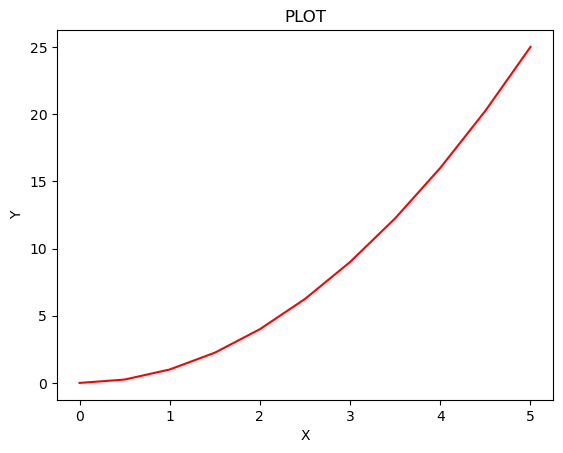

In [31]:
plt.plot(x, y, 'r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('PLOT')
plt.show()

## Creating Multiplots on Same Canvas

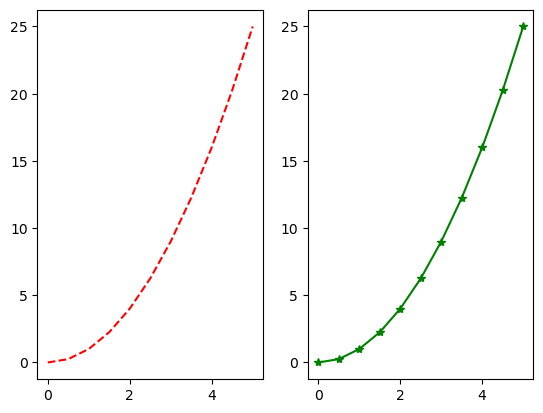

In [32]:
plt.subplot(1, 2, 1)
plt.plot(x, y, 'r--')
plt.subplot(1,2,2)
plt.plot(x, y, 'g*-');

## Legends

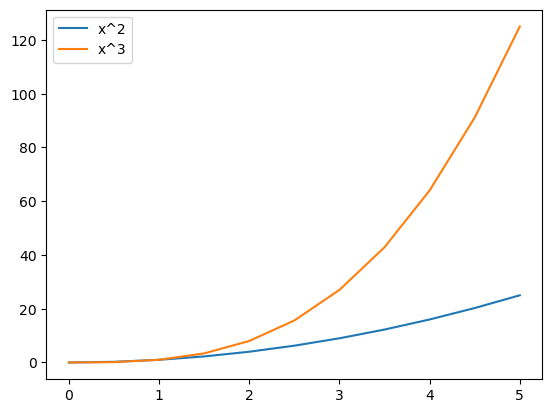

In [33]:
plt.plot(x, x**2, label ='x^2')
plt.plot(x, x**3, label = 'x^3')
plt.legend()
plt.show()

# Distribution Plots

In [34]:
import seaborn as sns

In [35]:
df = sns.load_dataset('tips')

In [36]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## distplot

The distplot shows the distribution of a univariate set of observations.

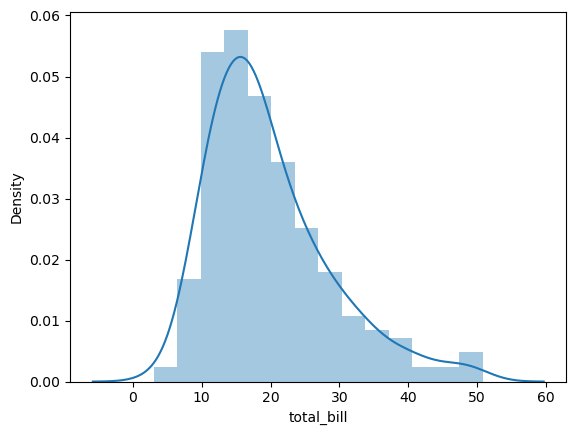

In [37]:
sns.distplot(df['total_bill']);

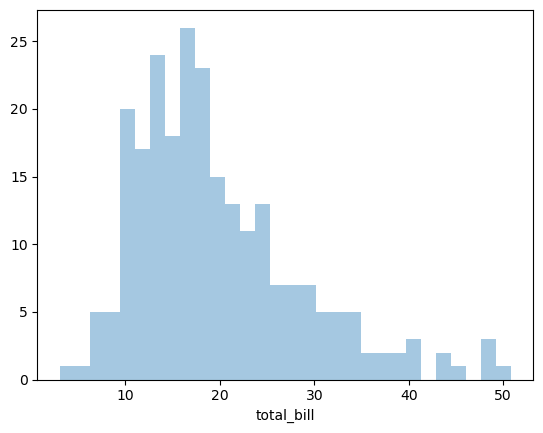

In [38]:
sns.distplot(df['total_bill'], kde=False, bins = 30);

## jointplot

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

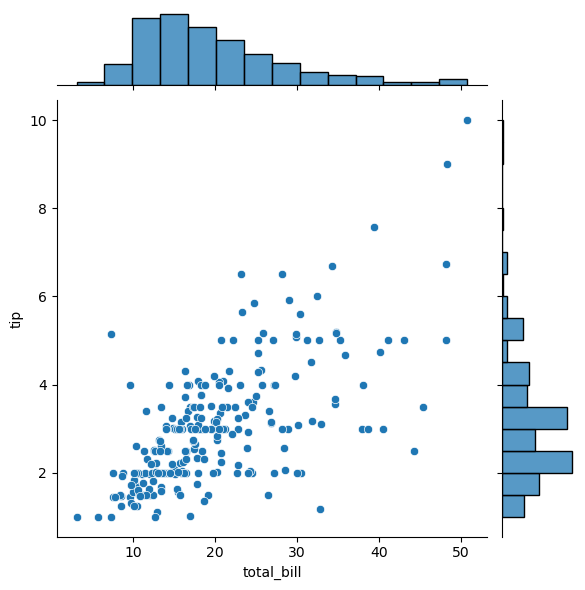

In [39]:
sns.jointplot(x='total_bill', y='tip', data=df, kind='scatter');

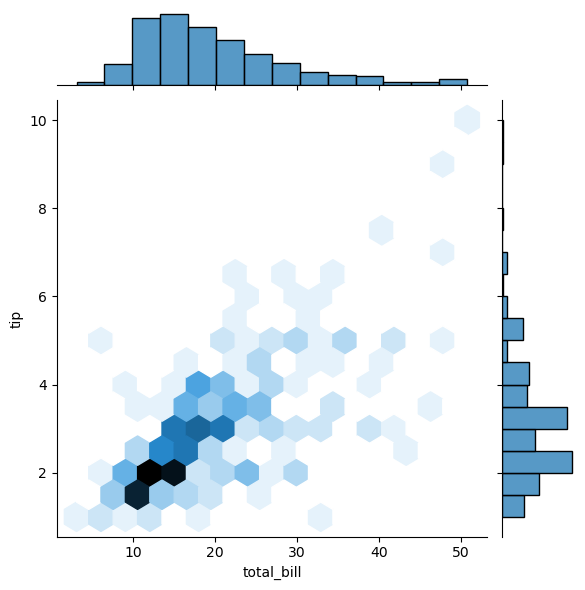

In [40]:
sns.jointplot(x='total_bill', y='tip', data=df, kind='hex');

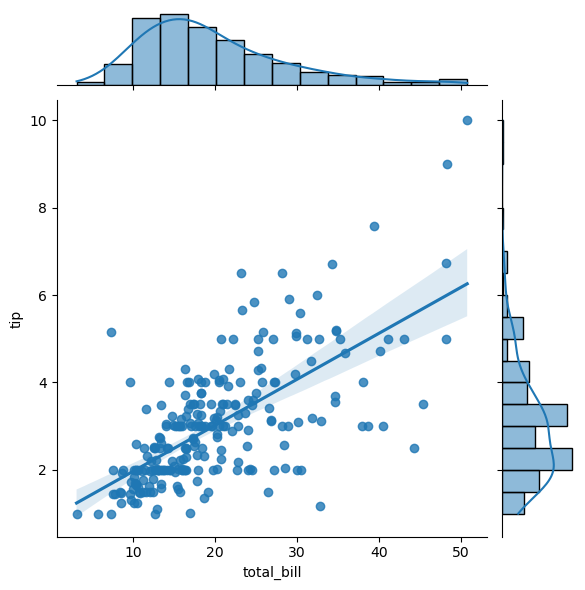

In [41]:
sns.jointplot(x='total_bill', y='tip', data=df, kind='reg');

## pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

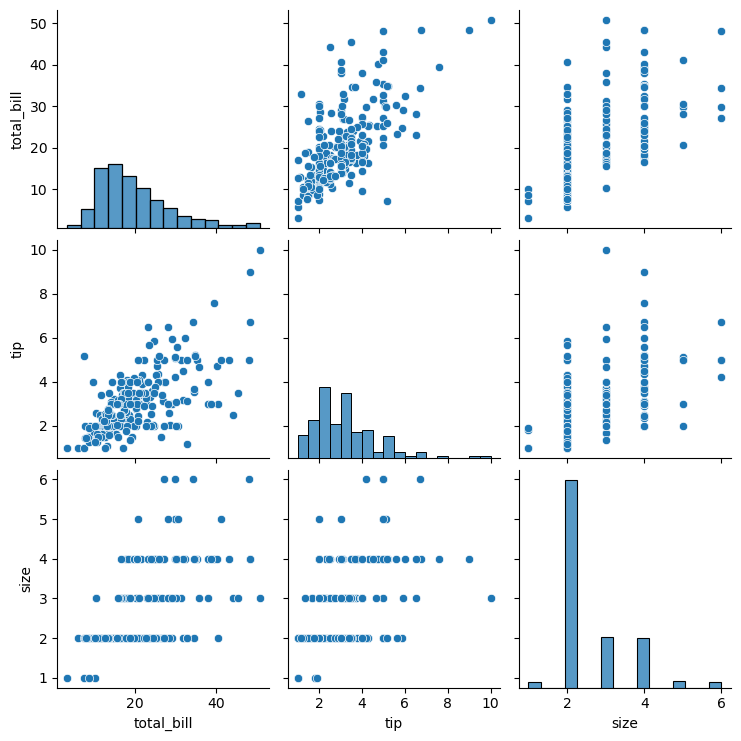

In [42]:
sns.pairplot(df);

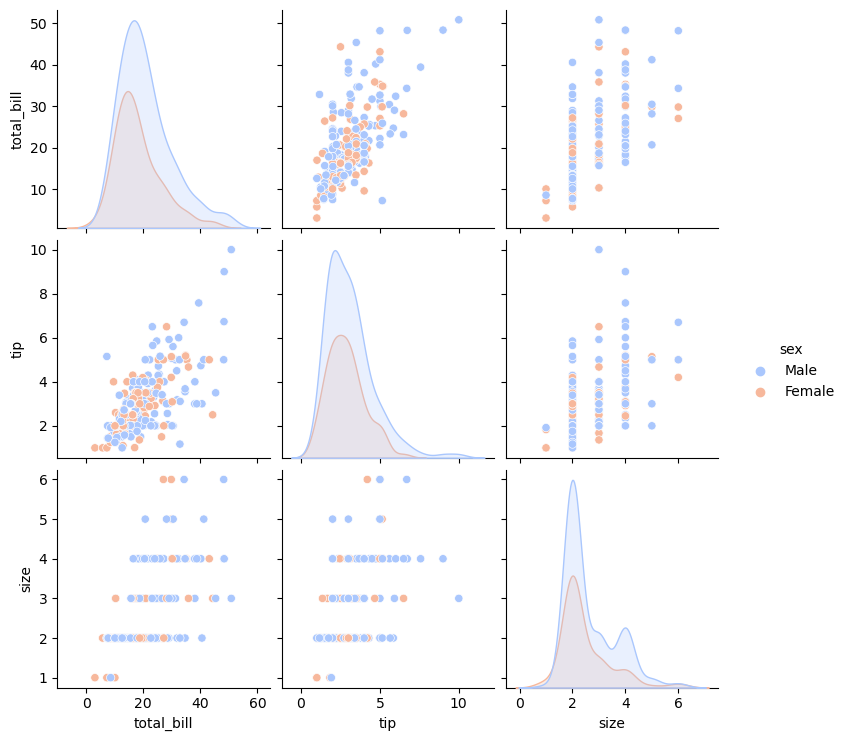

In [45]:
sns.pairplot(df, hue='sex', palette = 'coolwarm');

# Matrix Plots

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data (later in the machine learning section we will learn how to formally cluster data).


In [46]:
df2 = sns.load_dataset('flights')

In [47]:
df2.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [49]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [50]:
 df[['total_bill','tip', 'size']].corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


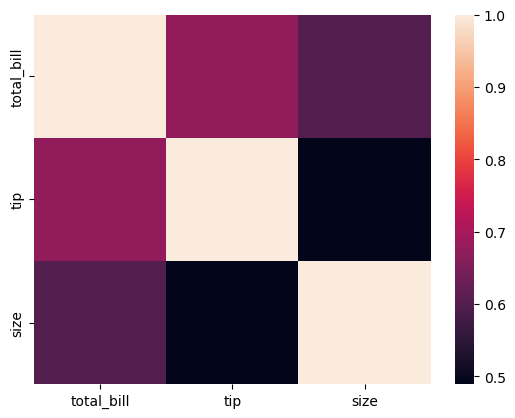

In [52]:
sns.heatmap( df[['total_bill','tip', 'size']].corr());

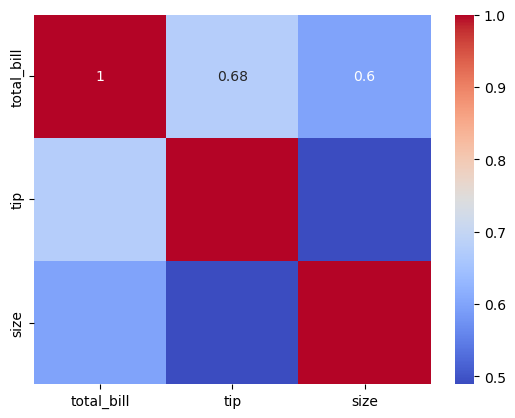

In [53]:
sns.heatmap( df[['total_bill','tip', 'size']].corr(), cmap='coolwarm', annot = True);

In [54]:
df2.pivot_table(values ='passengers', index ='month', columns = 'year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


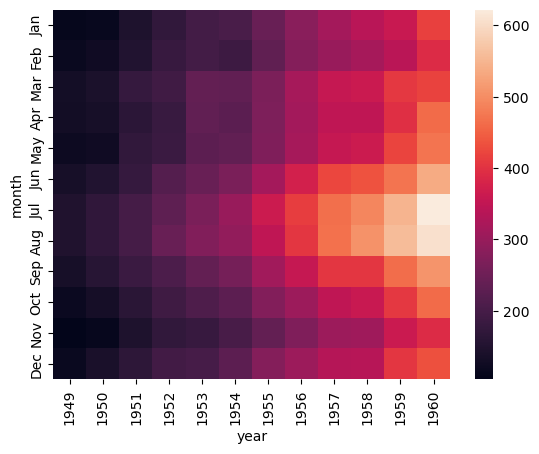

In [56]:
pv_df2 = df2.pivot_table(values ='passengers', index ='month', columns = 'year')
sns.heatmap(pv_df2);

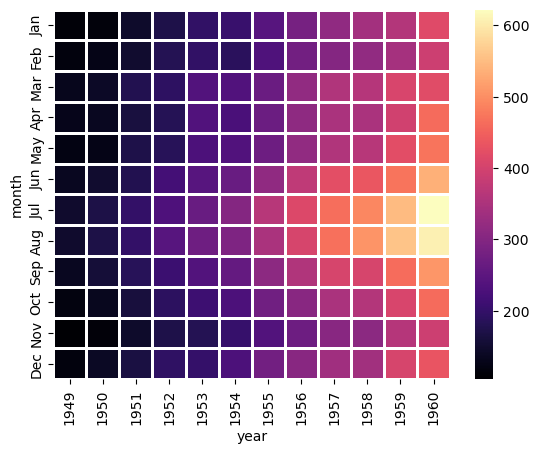

In [58]:
sns.heatmap(pv_df2, cmap='magma', linecolor = 'white', linewidth =1);

## clustermap

The clustermap uses hierarchal clustering to produce a clustered version of the heatmap. For example:

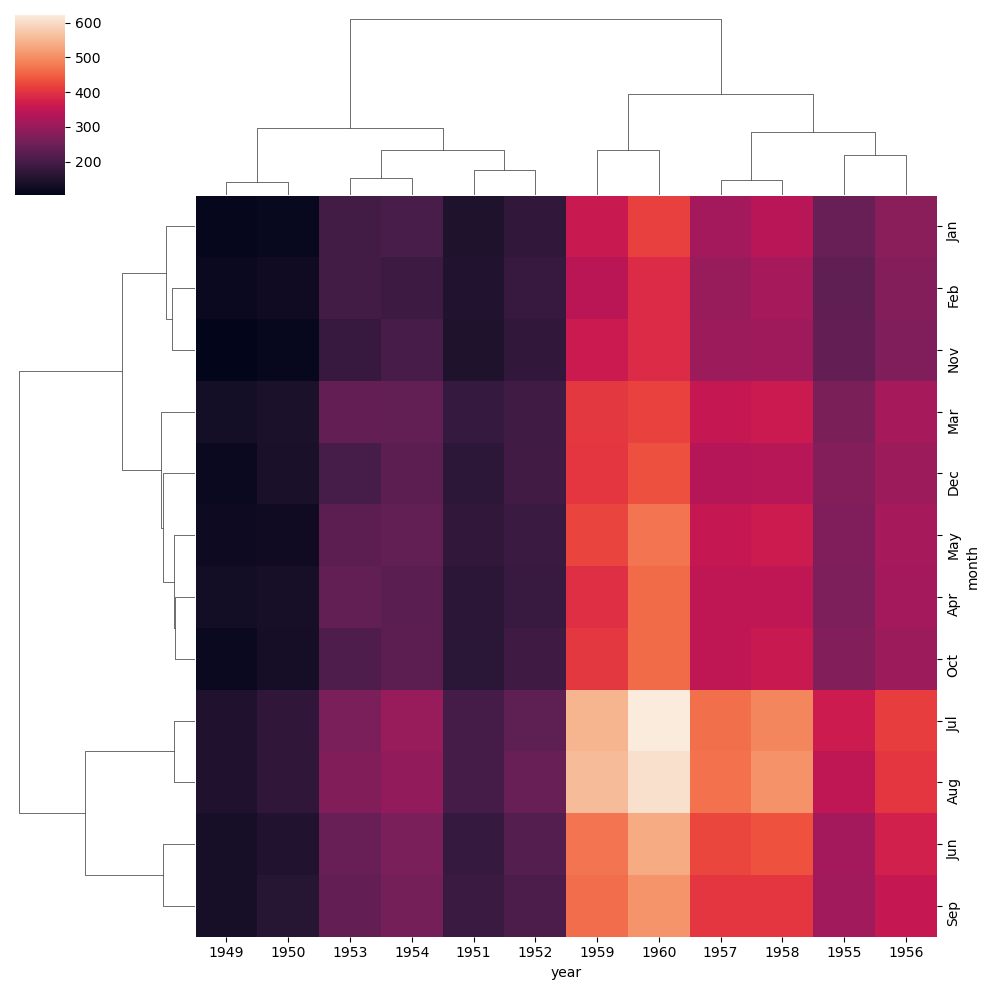

In [59]:
 sns.clustermap(pv_df2);

Notice now how the years and months are no longer in order, instead they are grouped by similarity in value (passenger count). That means we can begin to infer things from this plot, such as August and July being similar (makes sense, since they are both summer travel months)

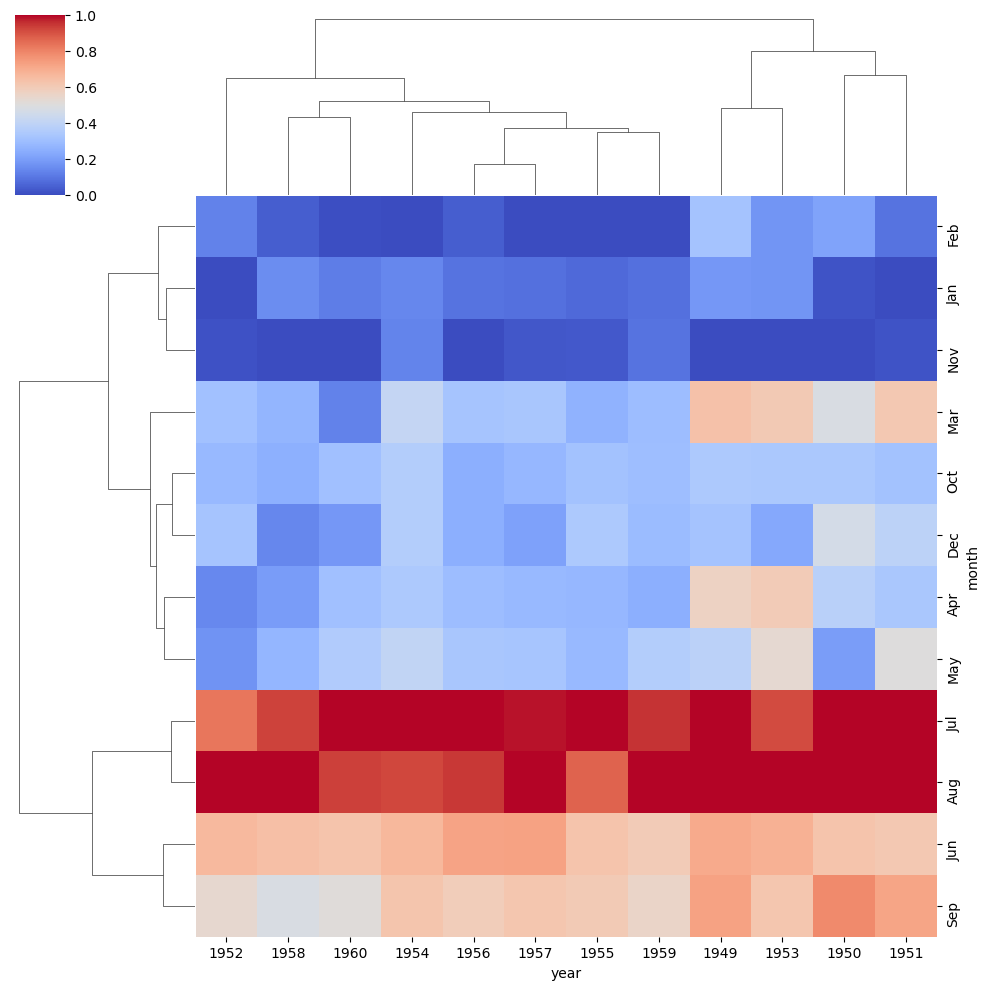

In [60]:
 sns.clustermap(pv_df2, cmap = 'coolwarm', standard_scale =1);

# Categorical Data Plots

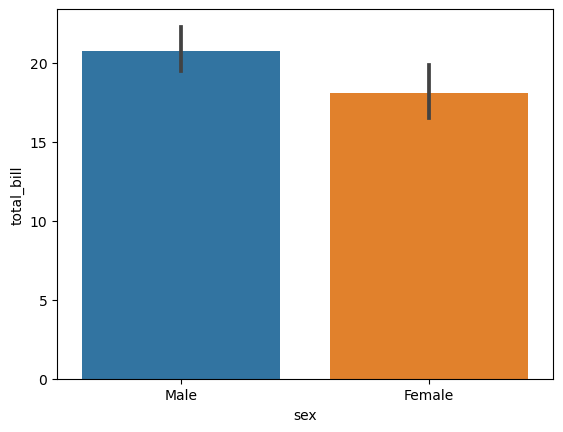

In [62]:
sns.barplot(x = 'sex', y = 'total_bill', data = df);

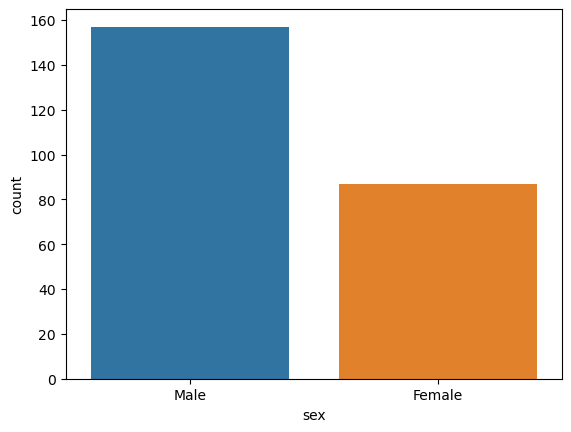

In [64]:
sns.countplot(x = 'sex', data = df);

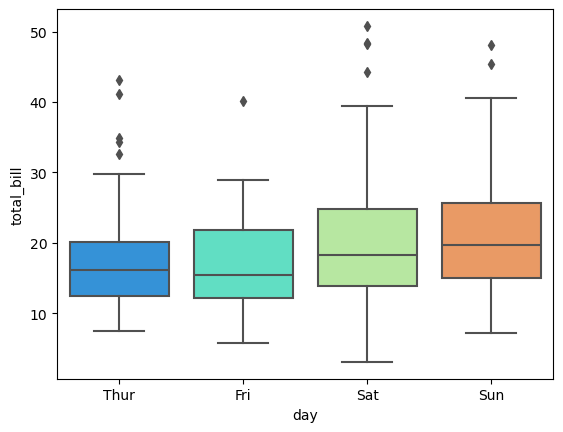

In [65]:
sns.boxplot(x = 'day', y= 'total_bill', data = df, palette ='rainbow');

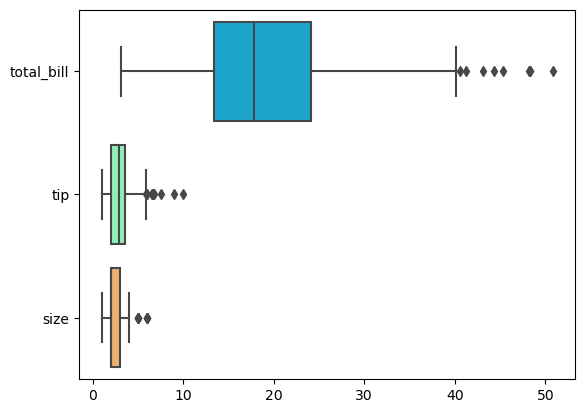

In [66]:
sns.boxplot(data = df, palette ='rainbow', orient ='h');

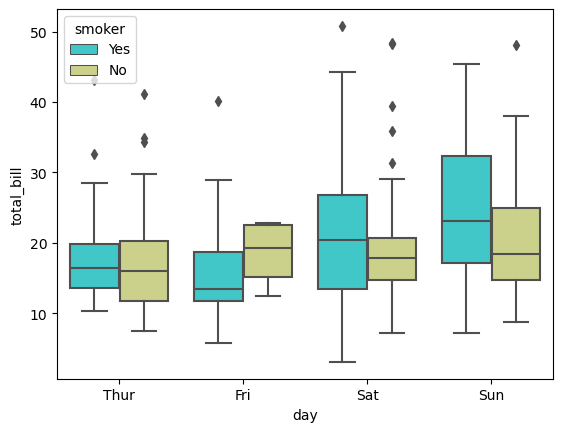

In [67]:
sns.boxplot(x = 'day', y= 'total_bill', hue ='smoker', data = df, palette ='rainbow');